# Who would win: Tyreek Hill or a slow high school guard?

In [32]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### [The Challenge:](https://twitter.com/FDSportsbook/status/1528065585799516162)

![screenshot of tweet](./tweet.png)

## The claim: Doesn't matter who's chasing me down, I'm getting that 

* Even Twitter comments can agree that Tyreek is the fastest dude on that list, so I'm using him as the proof of concept. If I can outrun him, I can outrun any of them.

#### You're insane if you think you can outrun Tyreek f'ing Hill

* Well, duh. But I also think you're underestimating just how big an advantage 30 yards is in a 100 yard race.

#### You're a moron

* Possibly, let's find out...

## Part 1: A naive approach

Here's what we know:
* Tyreek ran a 4.29 40-yard dash at his pro day
* I ran mine in 5.6 as a sophomore in high school

Assuming a simple constant speed, we can calculate the time each of us would reach the end zone. If Tyreek's time is less than mine, we can assume he tackled me before I reached the goal (not gonna happen).

Alec's time: 9.8s
Tyreek's time: 10.72s
How far I left him in the dust: 8.62 yards


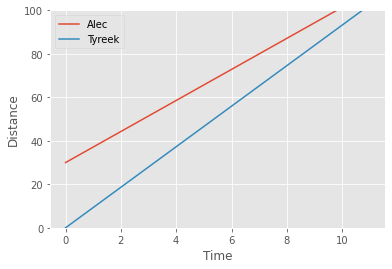

In [21]:
alec_speed, tyreek_speed = 40 / 5.6, 40 / 4.29  # yards/s

times = list(range(12))
data = {
    'Time': times,
    'Alec': [30 + alec_speed * t for t in times],
    'Tyreek': [tyreek_speed * t for t in times]
}
pd.DataFrame(data).plot(x='Time', ylabel='Distance', ylim=[0, 100])

alec_time, tyreek_time = 70 / alec_speed, 100 / tyreek_speed
print(f"Alec's time: {round(alec_time, 2)}s")
print(f"Tyreek's time: {round(tyreek_time, 2)}s")
print(f"How far I left him in the dust: {round(100 - tyreek_speed * alec_time, 2)} yards")

Better luck next time. 🏃

### But, but...

<iframe src="https://giphy.com/embed/2fs2I4ujlBf20" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/2fs2I4ujlBf20">via GIPHY</a></p>

Okay fine, _*maybe*_ it's possible that neither of us instantaneously reach our respective speeds. I can neither confirm nor deny.

## Part 2: More realistic acceleration

Acceleration during running is a function of the amount of force our legs can exert on the ground over a given period of time. Starting from rest, velocity starts out slow and increases exponentially based on the equation `Force = mass * acceleration`.

Of course, we don't keep accelerating forever. Eventually humans reach their max speed, the point where the amount of force they can produce is balanced by gravity, friction and wind resistance. The cumulative effect of all these forces should form a velocity chart in roughly the shape of a sigmoid function.

[Here's a cool discussion of the physics in more detail.](https://www.wired.com/2012/08/maximum-acceleration-in-the-100-m-dash/)

Unfortunately each of those values are impractical to measure individually, let alone the non-trivial interactions between them. However, the splits from Tyreek's various timings and races should enable a decent estimate of the summative function anyway.

Here's what we know:
* Tyreek:
  * weight: 185lbs
  * 40-time: 4.29s
  * 20-yard split: 2.51s
  * 10-yard split: 1.50s
  * 60m PB: 6.64s
  * 100m PB: 10.19s (to the guy yelling about him running a sub-10 - his absolute best is a 9.98, but it was run with a 5mph wind at his back and is not a legal )
* Alec:
  * weight: 205lbs
  * 40-time: 5.6s

To start, I just want to plot out Tyreek's times and fit them to a sigmoid

<AxesSubplot:xlabel='Time', ylabel='Velocity'>

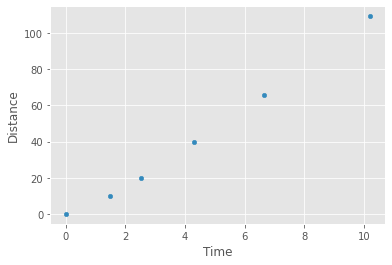

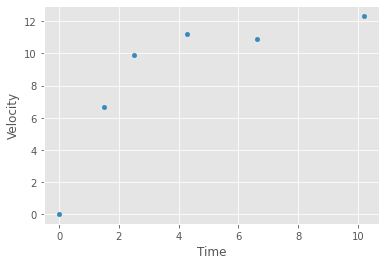

In [33]:
m_to_yds = 1.093613

distances = [0, 10, 20, 40, 60*m_to_yds, 100*m_to_yds]
times = [0, 1.5, 2.51, 4.29, 6.64, 10.19]
speeds = [0] + [(distances[i+1] - distances[i]) / (times[i+1] - times[i]) for i in range(5)]


def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

p0 = [max(speeds), np.median(times), 0, min(speeds)] # this is an mandatory initial guess

popt, _ = curve_fit(sigmoid, times, speeds, p0, method='dogbox')


data = pd.DataFrame({
    'Distance': distances,
    'Time': times,
    'Velocity': speeds,
})

data.plot.scatter(x='Time', y='Distance')
data.plot.scatter(x='Time', y='Velocity')